# Probability

We illustrate the concepts we want to introduce with a classic probability exercise called the birthday problem. Suppose you and a friend go to a party where there are 30 people (all unknown to both of you) and your friend wants to bet you that there are two people at that party who share their birthday. Would you be willing to take that bet?

Your willingness to take the bet should be related to the chance of winning the bet. What do you think it is more likely to happen: finding a pair with shared birthdays or having 30 distinct birthdays?

We will answer this question using the language of probability; we will calculate the probability of the event that at least two people share birthdays in a group of 30 people. In the following sections, we will introduce the rules we need for deriving this probability and then show how to estimate them using simulations.

In [7]:
import numpy as np
import pandas as pd

# a function that calculates the probability for 1<n<365
def birthday_prob(n):
    """Calculates the probability that at least 2 people
       out of n have the same birthday"""
    prob=1
    for i in np.arange(n):
        prob = prob * (365-i)/365
    return round(1-prob,4)

In [8]:
birthday_prob(30)

np.float64(0.7063)

The probability is close to 0.7 which means it is more likely your friend wins the bet.

Let’s also look on how these probabilities change with
. We construct below a dataframe that contains these probabilities for
 ranging from 2 to 60.

In [13]:
# Construct a data frame with the probabilities for a range of n's
number_people=np.arange(2,61,1)
b_probs= np.array([]) # an empty array

for i in number_people:
    b_probs= np.append(b_probs,birthday_prob(i))

Birthday_df=pd.DataFrame(
    {"Number of people":number_people,
     "Probability":b_probs})
Birthday_df.head(7)

,Number of people,Probability
0,2,0.0027
1,3,0.0082
2,4,0.0164
3,5,0.0271
4,6,0.0405
5,7,0.0562
6,8,0.0743


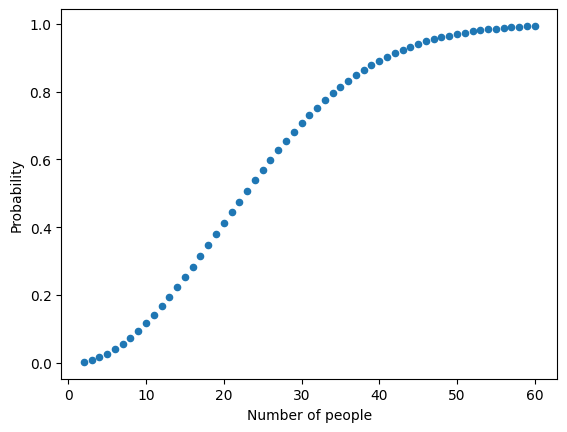

In [14]:
Birthday_df.plot.scatter("Number of people","Probability");

Are the above probabilities surprising? Can you provide an intuition for them? Note that the number of people that yields the probability closest to a fair bet is 23.

In [18]:
birthday_prob(23)

np.float64(0.5073)

# Simulating

In the birthday problem described at the beginning of this chapter (30 people at a party), the only information that is needed for deciding on matching birthdays is the set of birthdates. The simulation we will construct will focus on that - we just need a function that generates 30 random birthdays. It turns out we have already seen a function in numpy that can do that: random.choice.

The cell code below shows the results of simulating a group of 30 birthdates, where birthdates are described by the integers from 1 to 365 and saved in the array birthdays.

In [20]:
birthdays=np.arange(1,366,1)
n=30
one_run=np.random.choice(birthdays,n)
one_run

array([ 99, 140, 358, 235,   7,  80, 243,  36, 151, 224, 144, 364,  11,
         5, 183, 273,  34, 260, 148, 153, 148,  97, 339,  70,  89, 174,
       177, 189, 283, 273])

In [22]:
sorted(one_run)

[np.int64(5),
 np.int64(7),
 np.int64(11),
 np.int64(34),
 np.int64(36),
 np.int64(70),
 np.int64(80),
 np.int64(89),
 np.int64(97),
 np.int64(99),
 np.int64(140),
 np.int64(144),
 np.int64(148),
 np.int64(148),
 np.int64(151),
 np.int64(153),
 np.int64(174),
 np.int64(177),
 np.int64(183),
 np.int64(189),
 np.int64(224),
 np.int64(235),
 np.int64(243),
 np.int64(260),
 np.int64(273),
 np.int64(273),
 np.int64(283),
 np.int64(339),
 np.int64(358),
 np.int64(364)]

In [23]:
from collections import Counter
Counter([15,2,7,2,2,1,7])

Counter({2: 3, 7: 2, 15: 1, 1: 1})

In [24]:
Counter([15,2,7,2,2,1,7]).most_common(1)

[(2, 3)]

In [25]:
Counter([15,2,7,2,2,1,7]).most_common(1)[0][1]

3

We now create a function that will simulate nrep repetitions of the birthday setting for n subjects. The function returns an array that has nrep entries, each showing the count (frequency) of the most frequent birthday in one simulation.

In [27]:
def birthday_sim(n,nrep):
    '''Estimate birthday matching probabilities using nrep simulations'''
    outcomes = np.array([])
    for i in np.arange(nrep):
        outcomes = np.append(outcomes,
                             Counter(np.random.choice(birthdays,n)).most_common(1)[0][1])
    return outcomes

In [28]:
# results for ten repetitions of a group of 23 people
birthday_sim(23,10)

array([1., 2., 2., 1., 2., 2., 1., 2., 2., 2.])

In [29]:
n=23
nrep=1000
sum(birthday_sim(n,nrep)>=2)/nrep

np.float64(0.52)

### The triplets problem
Given a number of people,
, what is the probability that at least three share a birthday? Assumptions are the same as before:

a. 365 days in a year.

b. All days are equally likely.

c. Subjects have independent birthdays.

The exact formula for this probability is a lot more complicated than the one for the classical birthday problem (see reference below). Recall that we solved the birthday problem by focusing on the complement of the event of interest. The complement in the context of the triplets problem is as complicated as the event itself.

The next cell constructs a data frame with the estimated probabilities for
 ranging from 40 to 120; the range was selected to illustrate how probabilities are different than in the previous section.

Note that the only difference in the code is when we count the number of repetitions where the most frequent birthday count is larger or equal to 3.

In [30]:
nrep=1000
number_people=np.arange(40,121,1)
probs3= np.array([])
for i in number_people: probs3= np.append(probs3,sum(birthday_sim(i,nrep)>=3)/nrep)

Birthday3_df=pd.DataFrame(
    {"Number of people":number_people,
     "Triplet Probability":probs3})

Birthday3_df.tail(5)

,Number of people,Triplet Probability
76,116,0.799
77,117,0.801
78,118,0.810
79,119,0.803
80,120,0.836


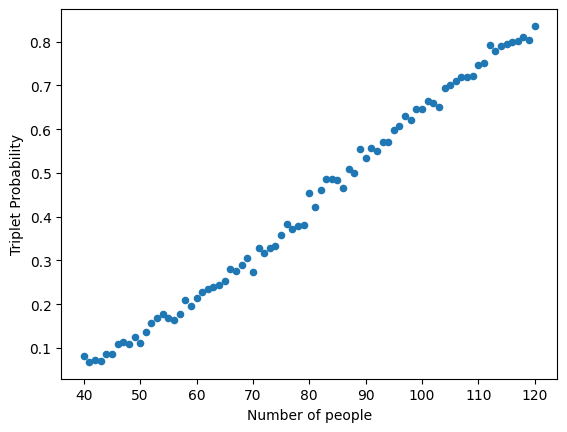

In [31]:
Birthday3_df.plot.scatter("Number of people","Triplet Probability");

In [32]:
n=87
nrep=10000
sum(birthday_sim(n,nrep)>=3)/nrep

np.float64(0.5002)

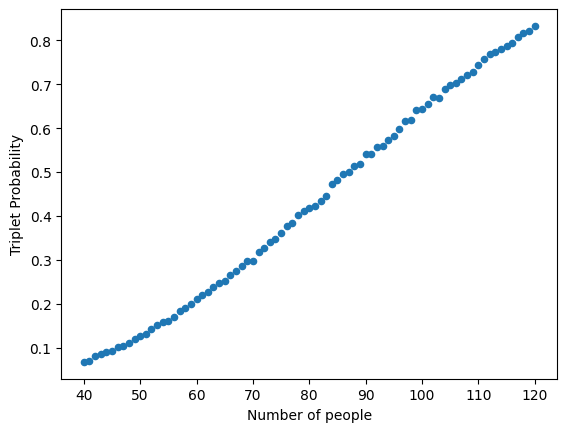

In [33]:
nrep=10000
number_people=np.arange(40,121,1)
probs3= np.array([])
for i in number_people: probs3= np.append(probs3,sum(birthday_sim(i,nrep)>=3)/nrep)

Birthday3_v2_df=pd.DataFrame(
    {"Number of people":number_people,
     "Triplet Probability":probs3})

Birthday3_df.tail(5)

Birthday3_v2_df.plot.scatter("Number of people","Triplet Probability");

### The birthday problem: relaxed assumptions

There are two assumptions we used in the last few sections while investigating the birthday problem - equally likely birthdates and ignoring February 29 as a possible birth date. While relaxing these can complicate the mathematical calculation, the simulations can be easily modified to account for more complicated scenarios.

We use below a dataset from FiveThirtyEight that contains the number of daily births in US between 2000 and 2014 to estimate the odds of each day of the year to be a birthday:

In [34]:
birth_data = pd.read_csv("/Users/guywinfield/PycharmProjects/Data/Statistics/US_births_2000-2014_SSA.csv")
birth_data

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558
...,...,...,...,...,...
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634


In [36]:
counts_df=birth_data.groupby(['month','date_of_month']).sum()[['births']]
counts_df.head(5)

births
month date_of_month        
1     1              116030
      2              144083
      3              170115
      4              171663
      5              166682

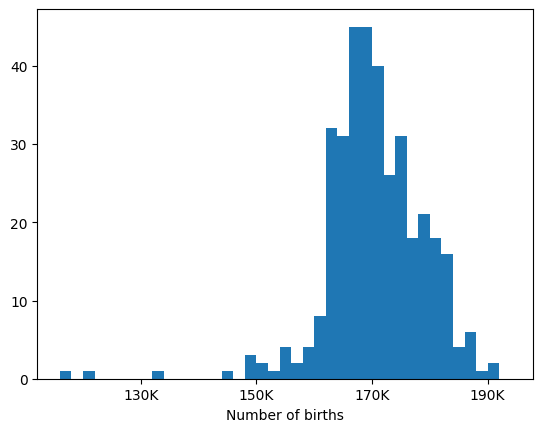

In [41]:
import matplotlib.pyplot as plt

plt.hist(counts_df.births,bins = np.arange(116000, 195000, 2000))
plt.xticks(ticks=[130000,150000,170000,190000], labels=["130K","150K","170K","190K"])
plt.xlabel("Number of births");

In [42]:
bday_probs=counts_df.births/sum(counts_df.births)

In [43]:
# adding February 29 - the number of possible birthdays is now 366
birthdays2=np.arange(1,367,1)

def birthday_sim2(n,nrep,pr):
    '''Estimate birthday matching probabilities using nrep simulations.
       The 366 possible birthdays are weighted by given probabilities'''
    outcomes = np.array([])
    for i in np.arange(nrep):
        outcomes = np.append(outcomes,
                Counter(np.random.choice(birthdays2,n,p=pr)).most_common(1)[0][1])
    return outcomes

In [44]:
n=23
nrep=100000
sum(birthday_sim2(n,nrep,bday_probs)>1)/nrep

np.float64(0.50755)

# Distributions

We formalize this idea by considering the following example. Suppose we toss a fair coin twice and record the number of heads observed as random variable
. We can list out all possibilities in the sample space
, where H corresponds to heads and T to tails. We see that our random variable
 can be 0, 1, or 2.

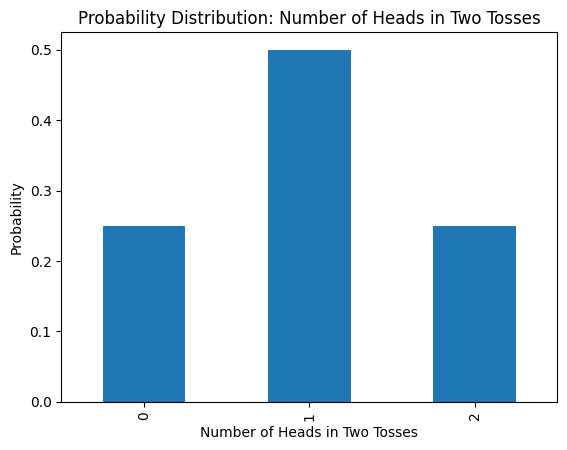

In [47]:
probabilities =[.25, .5, .25]
prob_df = pd.DataFrame(probabilities)
prob_df.plot.bar(legend=False);

plt.title('Probability Distribution: Number of Heads in Two Tosses')
plt.xlabel('Number of Heads in Two Tosses')
plt.ylabel("Probability");

These probabilities are theoretical in the sense that in a perfect situation, we would achieve exactly these results. But what happens if we try this experiment in real life? Below we toss a coin twice and record the number of observed heads. We can repeat this experiment 5 times and compute how many times we observed 0 heads, 1 head, or 2 heads.

In [49]:
coin = ['H', 'T']

coin_toss = np.random.choice(coin, 2)
print(coin_toss)

['T' 'H']


In [50]:
def Coin_toss(n_sim):
  '''Takes n_sim: number of times to simulate tossing a coin twice and observing number of heads
  Outputs observed_heads array '''

  observed_heads = np.empty(0)
  for i in range(0,n_sim):
    coin_toss_output = np.random.choice(coin, 2)
    head_count = np.count_nonzero(coin_toss_output == 'H')
    observed_heads = np.append(observed_heads, head_count)
  return observed_heads

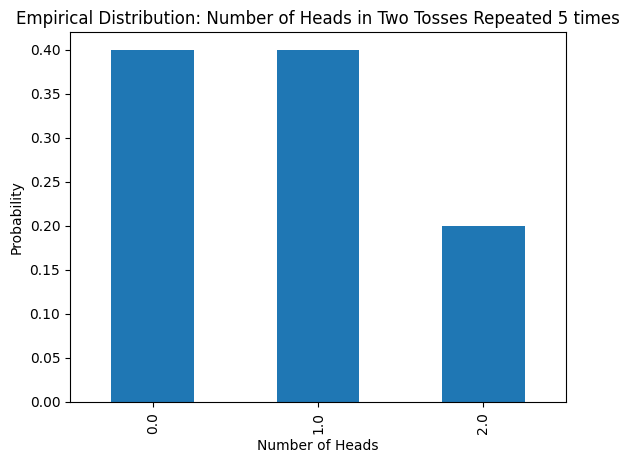

In [51]:
np.random.seed(1234)
options, counts = np.unique(Coin_toss(5), return_counts=True)

empirical_df = pd.DataFrame(counts/5, index = options)
empirical_df.plot.bar(legend=False);


plt.title('Empirical Distribution: Number of Heads in Two Tosses Repeated 5 times')
plt.xlabel('Number of Heads')
plt.ylabel("Probability");

This is the empirical distribution of observing the number of heads from tossing a coin twice and repeating that experiment 5 times. But this does not match the probabilities we calculated in theory. Let’s see what happens when we increase the number of experiments. Instead of 5, let’s try 100.

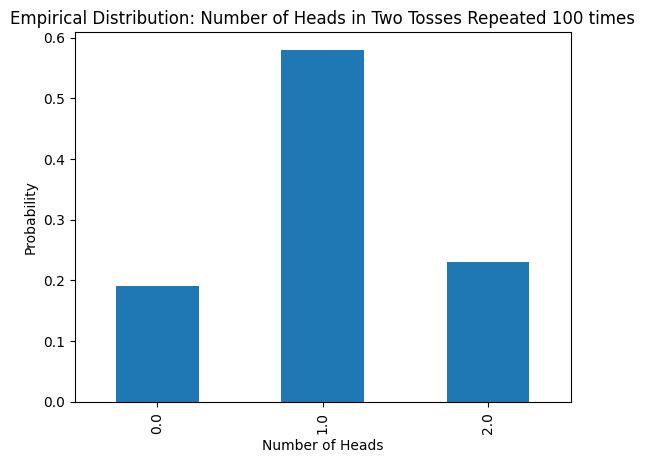

In [52]:
np.random.seed(1234)
options, counts = np.unique(Coin_toss(100), return_counts=True)

empirical_df = pd.DataFrame(counts/100, index = options)
empirical_df.plot.bar(legend=False);


plt.title('Empirical Distribution: Number of Heads in Two Tosses Repeated 100 times')
plt.xlabel('Number of Heads')
plt.ylabel("Probability");

In [53]:
print('Probability of getting 0 heads:', (counts/100)[0])
print('Probability of getting 1 head:', (counts/100)[1])
print('Probability of getting 2 heads:', (counts/100)[2])

Probability of getting 0 heads: 0.19
Probability of getting 1 head: 0.58
Probability of getting 2 heads: 0.23


### Continuous Example

Instead of a probability mass function, when considering continuous random variables we construct a probability density function (pdf), from which probabilities of events can be calculated. While all probabilities in a sample space sum to 1 in the discrete case, in the continuous case this corresponds to an area of 1 under the curve of the probability density function. An example of a continuous distribution looks like the graph below.



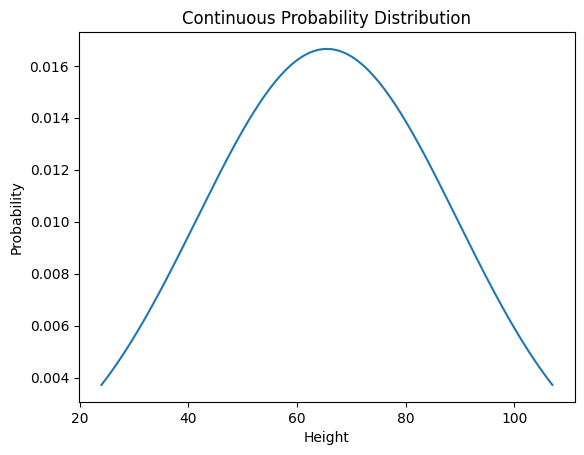

In [55]:
from scipy.stats import norm
import statistics
from scipy import stats as stats
# Ignore this code for now and focus on the output!
x_axis = np.arange(24, 107, 0.01)
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.title('Continuous Probability Distribution')
plt.xlabel('Height')
plt.ylabel("Probability");
plt.show()

An example of a continuous distribution would be choosing people at random from a sample and recording their height. This is a continuous variable as values could be in the range [24, 107] inches. We could then calculate probabilities of getting any interval subset, including unions and intersections, of the given sample space [24, 107]. For example, we can calculate
’
‘
 or more simply
. On the probability density function, this corresponds to calculating the area under the curve to the left of 60. See below for the shaded graph.

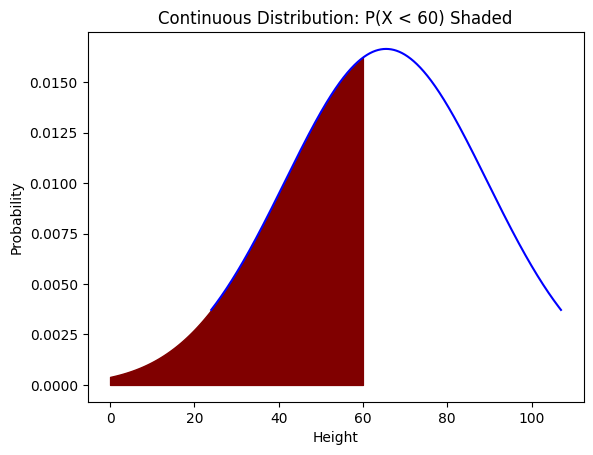

In [56]:
# Ignore this code for now and focus on the output!
x_axis = np.arange(24, 107, 0.01)

mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
iq=stats.norm(mean,sd)
plt.plot(x_axis,iq.pdf(x_axis),'b')
px=np.arange(0,60,0.01)
plt.fill_between(px,iq.pdf(px),color='maroon')

plt.title('Continuous Distribution: P(X < 60) Shaded')
plt.xlabel('Height')
plt.ylabel("Probability");
plt.show()

However, with continuous random variables, the probability of getting a single value from the sample space, for example
, is always 0 as the probability of picking this exact value out of the infinite number of values in the sample space is infinitesimally small. For that reason, when discussing continuous random variables, we are interested in intervals such as
,
, or
. We can visualize this probability on the pdf as the area between the heights of 61.134 and 72.56.

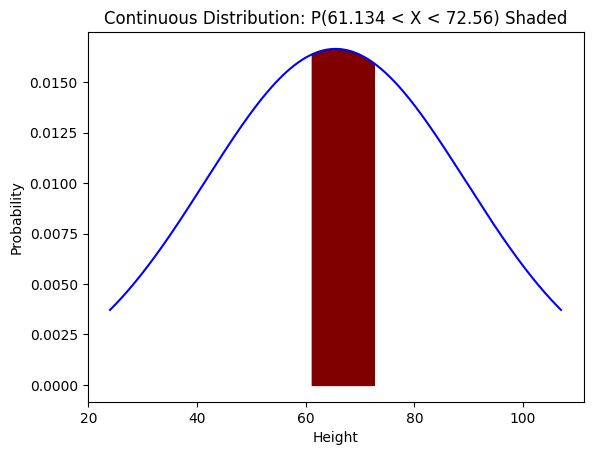

In [58]:
# Ignore this code for now and focus on the output!
x_axis = np.arange(24, 107, 0.01)

mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
iq=stats.norm(mean,sd)
plt.plot(x_axis,iq.pdf(x_axis),'b')
px=np.arange(61.134,72.56,0.01)
plt.fill_between(px,iq.pdf(px),color='maroon')

plt.title('Continuous Distribution: P(61.134 < X < 72.56) Shaded')
plt.xlabel('Height')
plt.ylabel("Probability");
plt.show()

# Uniform Distribution

In [60]:
die = pd.DataFrame(
   {
       'Face': np.arange(1, 7),
   }
)
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


In [63]:
# the input argument 1 denotes that we want to select exactly one row. We can choose to sample more than one row by changing this input.
die.sample(1)

,Face
4,5


In [64]:
die.sample(10, replace=True, random_state=1)

,Face
5,6
3,4
4,5
0,1
1,2
3,4
5,6
0,1
0,1
1,2


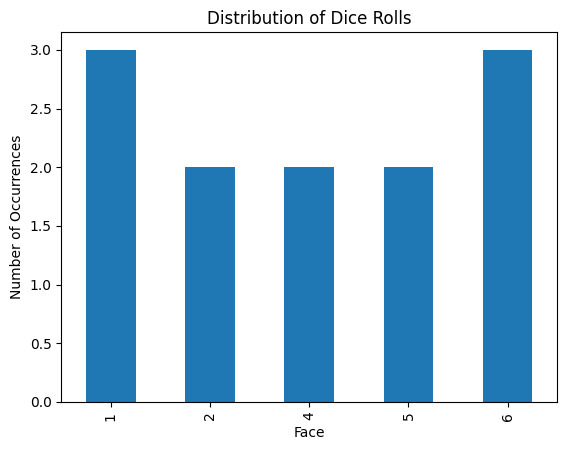

In [65]:
# This code takes a sample of 12 die, looks at the faces column of the dataframe,
#        counts the number of times each value occurs, sorts them from 1 to 6, the plots a bar chart
#
# Note we use a barchart to depict a discrete distribution

die.sample(12, replace=True, random_state=1).Face.value_counts().sort_index().plot.bar();
plt.xlabel('Face');
plt.ylabel("Number of Occurrences");
plt.title("Distribution of Dice Rolls");
plt.show()

Randomly sampling 1,000 rolls of the die we start to see a more evenly distributed graph.



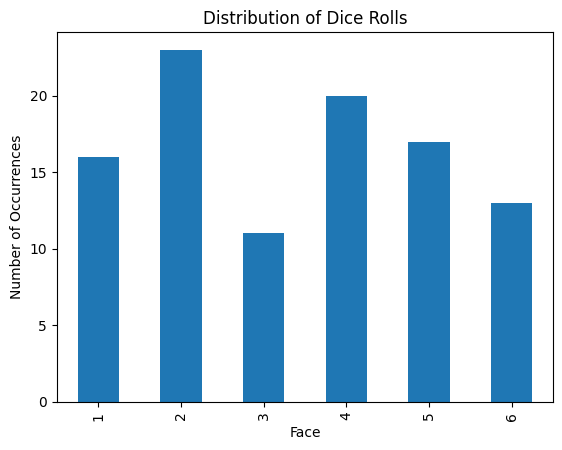

In [67]:
die.sample(100, replace=True).Face.value_counts().sort_index().plot.bar();
plt.xlabel('Face');
plt.ylabel("Number of Occurrences");
plt.title("Distribution of Dice Rolls");
plt.show()

Let’s see how the distribution changes as we increase the number of randomly sampled rolls of a six-sided die.



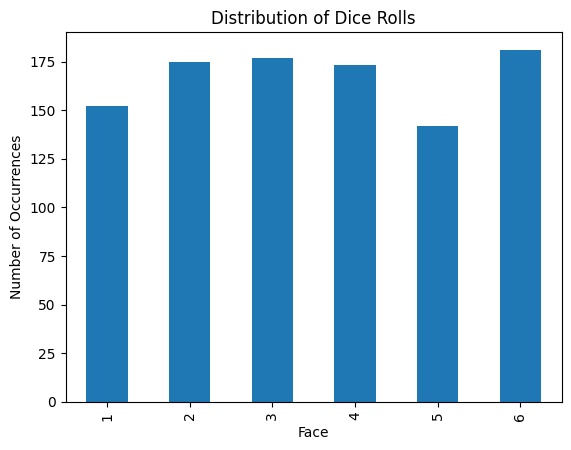

In [69]:
die.sample(1_000, replace=True).Face.value_counts().sort_index().plot.bar();
plt.xlabel('Face');
plt.ylabel("Number of Occurrences");
plt.title("Distribution of Dice Rolls");
plt.show()

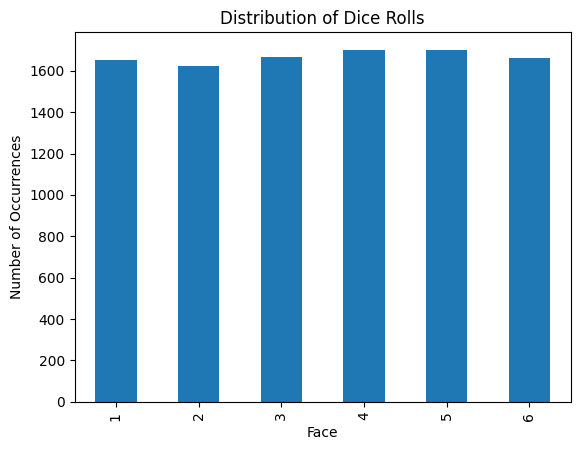

In [70]:
die.sample(10_000, replace=True).Face.value_counts().sort_index().plot.bar();
plt.xlabel('Face');
plt.ylabel("Number of Occurrences");
plt.title("Distribution of Dice Rolls");
plt.show()

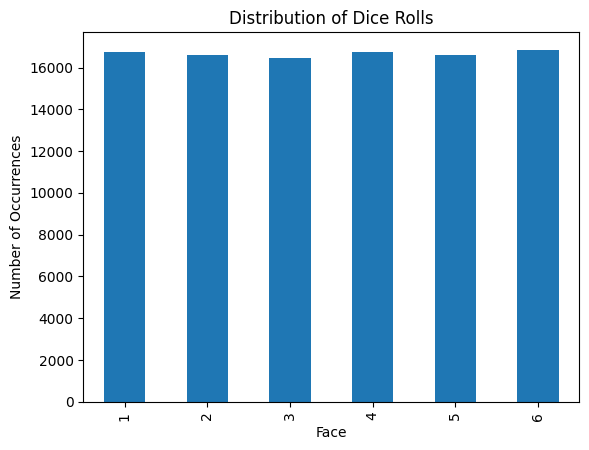

In [71]:
die.sample(100_000, replace=True).Face.value_counts().sort_index().plot.bar();
plt.xlabel('Face');
plt.ylabel("Number of Occurrences");
plt.title("Distribution of Dice Rolls");
plt.show()

As the number of samples increases – that is, as we roll the die many many many times – we find that the empirical distribution (our observed distribution of dice rolls) shows each face of the die appears roughly the same number of times. As we know the probability of sampling each face of the die is the same, we are seeing our empirical distribution get closer to the true probability distribution of the die, looking more uniform.

This phenomenon is related to a mathematical theorem known as the Law of Large Numbers. The Law of Large Numbers states that, as the number of experiments increases, the mean of the empirical distribution gets closer to the mean of the probability distribution (also known as the expected value).

In [72]:
np.mean(die.sample(100, replace=True))

np.float64(3.66)

In [73]:
np.mean(die.sample(1_000, replace=True))

np.float64(3.51)

In [74]:
np.mean(die.sample(1_000_000, replace=True))

np.float64(3.500866)

### Discrete Uniform Probability Distribution

For our example of rolling a six-sided die, each roll has a probability of exactly

 of occurring. If we take the example of rolling a six-sided die 1000 times and computing the probabilities of each result, we find that, in practice, the empirical probability we rolled a 1 was
, not the
 given by the theoretical probability.

In [76]:
#both the np.random.choice and DataFrame.sample functions sample from a uniform distribution by default
empirical_probabilities = (die.sample(1_000, replace=True,random_state=1).value_counts())/1_000
empirical_probabilities

Face
1       0.171
6       0.170
3       0.169
2       0.166
5       0.164
4       0.160
Name: count, dtype: float64

In our dice rolling example, n is 6 so the mean of our probability distribution is

. So the means of our empirical distributions are indeed approaching 3.5 as the samples get larger. We can also calculate the variance and standard deviation for the probability distribution of dice rolling. The variance of a uniform probability distribution with sample space sample space S = {1, 2, …, n} is:

In [77]:
np.std(die.sample(1_000_000, replace=True))

/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Face    1.707369
dtype: float64

### Continuous Uniform Probability Distribution

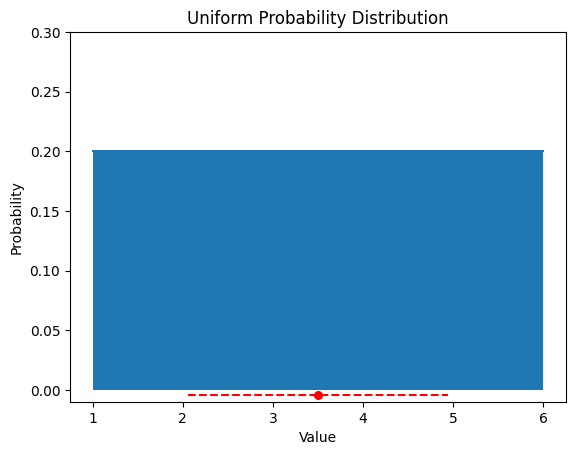

In [79]:
plt.plot([1,2,3,4,5,6], [0.2]*6)
plt.fill_between([1,2,3,4,5,6], [0.2]*6, 0)
plt.scatter(7/2, -0.004, color='red', s=30)
plt.hlines(y=-0.004, xmin=7/2 - 1.44, xmax=7/2 + 1.44, color = 'red', linestyles = 'dashed')
plt.ylim([-0.01,0.3]);
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Uniform Probability Distribution");

Often, it is useful to be able to draw samples from a known distribution like the uniform. Previously, we have used np.random.sample to draw samples from a given list. The np.random module has other useful functions for drawing random samples, including np.random.uniform. This function takes in a value for low and high has well as a size (the number of samples to draw) and draws from the continuous uniform probability distribution on the interval [low to high). Below, we draw 10 random samples from the uniform distribution depicted above.

In [81]:
np.random.uniform(low = 1, high = 6, size = 10)

array([2.1160126 , 2.97124703, 2.85079108, 1.4424016 , 1.60823934,
       1.06082288, 2.20408381, 3.02610492, 5.62661501, 4.67637788])

We can use this random number generator to create an empirical distribution for the continuous uniform.


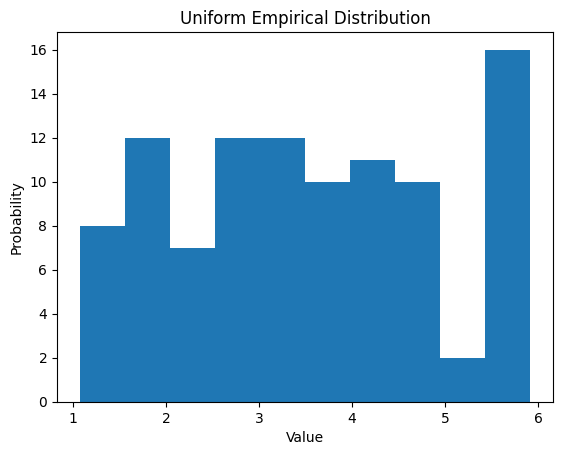

In [82]:
# Note we use a histogram to depict a continuous distribution
plt.hist(np.random.uniform(1,6,100));
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Uniform Empirical Distribution");

Again, due to the Law of Large Numbers, as the size of the sample increases, we see the histograms look more like the graph of the uniform probability distribution.

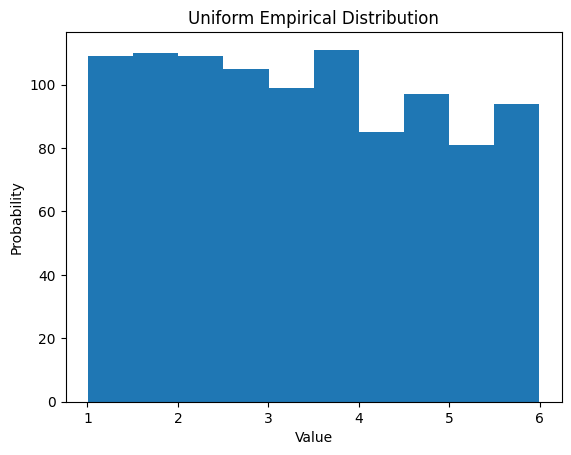

In [84]:
plt.hist(np.random.uniform(1,6,1_000));
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Uniform Empirical Distribution");

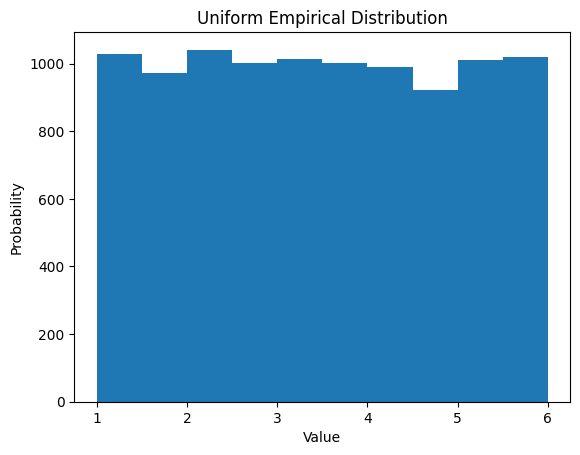

In [85]:
plt.hist(np.random.uniform(1,6,10_000));
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Uniform Empirical Distribution");

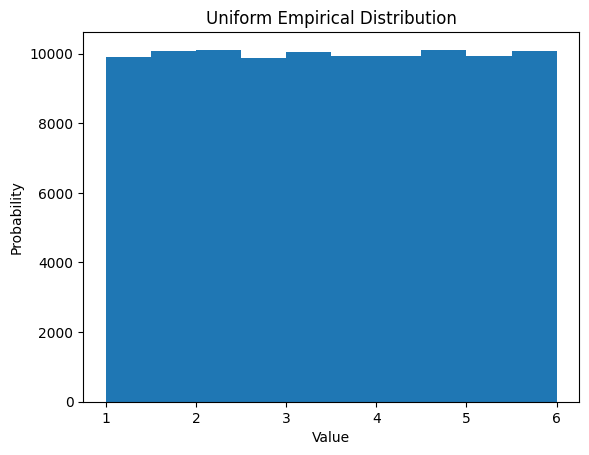

In [86]:
plt.hist(np.random.uniform(1,6,100_000));
plt.xlabel("Value");
plt.ylabel("Probability");
plt.title("Uniform Empirical Distribution");

In [87]:
np.random.uniform(1,6,100_000).mean()

np.float64(3.4969273238673484)

In [88]:
np.random.uniform(1,6,100_000).std()

np.float64(1.4473933177291365)

# Normal Distribution (See separate notebook "Normal Distribution.ipynb")

# Binomial Distribution

As the prefix bi- implies, the Binomial Probability distribution describes a situation with two possible outcomes - often times described as ‘success’ or ‘failure’.

### Bernoulli Trials

Statisticians call any random experiment with two possible outcomes as described above a Bernoulli Trial. For example, flipping a coin has two outcomes: “Heads” or “Tails” each with a fixed probability. Each independent coin flip would be a Bernoulli trial. Many other scenarios can be presented as Bernoulli trials as well. Consider a standard, shuffled deck of cards. I am interested in whether the top card in the deck is a 7. The card either is or is not a 7 (two options) so independent events of flipping the top card of a shuffled deck are Bernoulli trials.

### What is the Binomial Distribution?

The Binomial distribution describes the probability of specific types of experiments called a sequence of Bernoulli trials. Such a sequence satisfies

There are a fixed,
, number of trials

There are exactly two possible outcomes - often times described as ‘success’ or ‘failure’.

Each trial is independent (i.e. does not depend on outcomes of previous trials)

The probability of success,
, is the same for each trial

Examples satisfying these requirements include: flipping a coin 5 times to see how many heads occur or having 6 children to see how many girls are born. In each of these cases, we are dealing with counts of successes. This means that the binomial distribution is a discrete probability distribution.

### Binomial Empirical Distribution


Let’s again consider our six-sided die for a different experiment! Suppose we are interested in rolling a die and getting an even number. We want to know what happens if we repeat this trial 10 times, what is the probability that we have 1 success (1 even), 2 successes (2 evens), 3 successes…?

This example is indeed a sequence of Bernoulli trials as there are a fixed
 number of trials, there are exactly two outcomes: evens - ‘success’ and odds - ‘failure’, each trail is independent, and the probability of success is
. To determine what this distribution looks like through observation, we would repeat this experiment 100, 1000 or more times to get an empirical distribution.

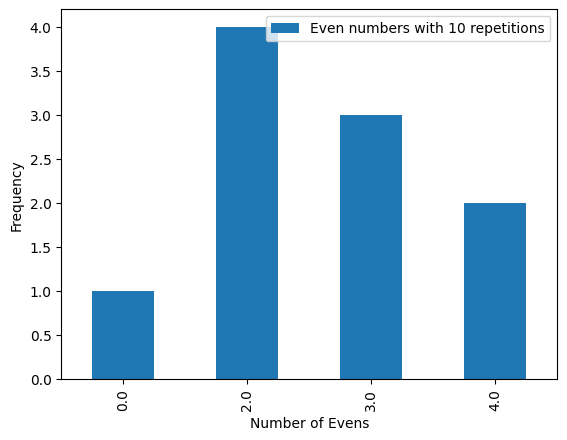

In [94]:
die = np.arange(1, 7)

def parity(input_integer):
    if (input_integer % 2) == 0:
        return "even"
    else:
        return "odd"

vec_parity = np.vectorize(parity)

np.random.seed(1234)

def parity_experiment(num_experiments):
  total_evens = np.empty(0)
  for i in np.arange(num_experiments):
      choices = np.random.choice(die, 5)
      labels = vec_parity(choices)

      total_evens = np.append(total_evens, sum(labels == 'even'))

  legend = f'Even numbers with {num_experiments:,} repetitions'

  options, counts = np.unique(total_evens, return_counts=True)
  pd.DataFrame({legend:counts}, index=options).plot.bar()

  plt.xlabel('Number of Evens')
  plt.ylabel("Frequency");

parity_experiment(10)

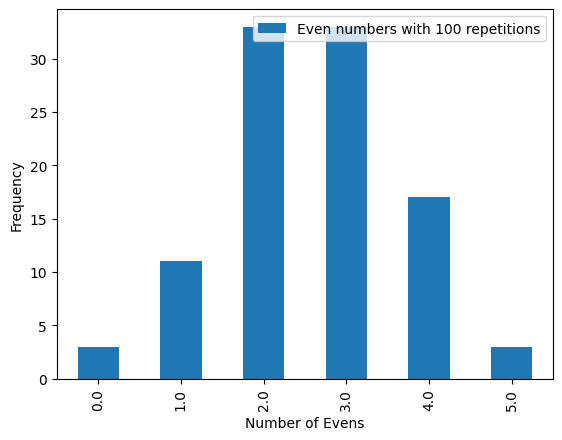

In [95]:
np.random.seed(1234)
parity_experiment(100)

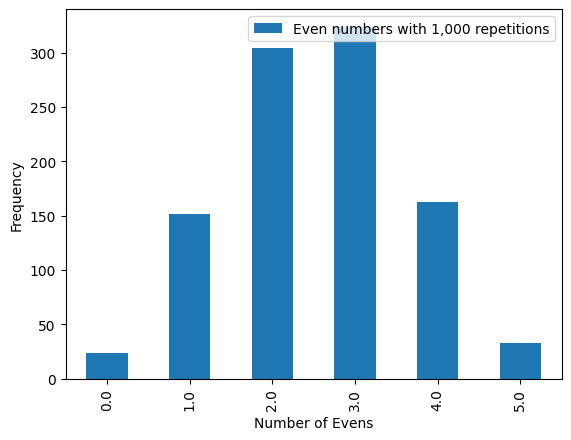

In [96]:
parity_experiment(1000)

### Binomial Probability Distribution

For the event that we just simulated, we have the ability to calculate the probabilities for each event in the sample space. In particular, we can assign probabilities corresponding to the number of successes. For a trial of
 experiments, we are interested in the probability of exactly
 successes, where
. Given a sequence of Bernoulli trials, we define a random variable
 that records the number of successes. The discrete distribution function for
 is called the Binomial Probability Distribution and its pmf is given by:

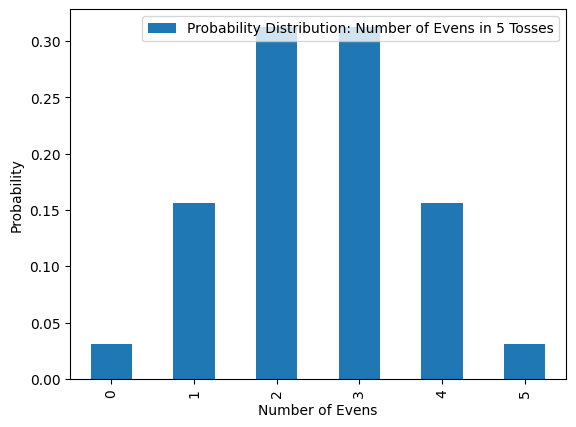

In [101]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def binomial_prob(n, p, j):
    '''A function that calculates probabilities from a binomial distribution with parameters n and p'''
    n_choose_j = math.factorial(n) / (math.factorial(j) * math.factorial(n - j))
    return n_choose_j * p**j * (1 - p)**(n - j)

binomial_list = []
n = 5
p = 0.5
for i in range(0, 6):
    binomial_list.append(binomial_prob(n, p, i))

legend = f'Probability Distribution: Number of Evens in 5 Tosses'

pd.DataFrame({legend: binomial_list}).plot.bar()
plt.xlabel('Number of Evens')
plt.ylabel("Probability")
plt.show()


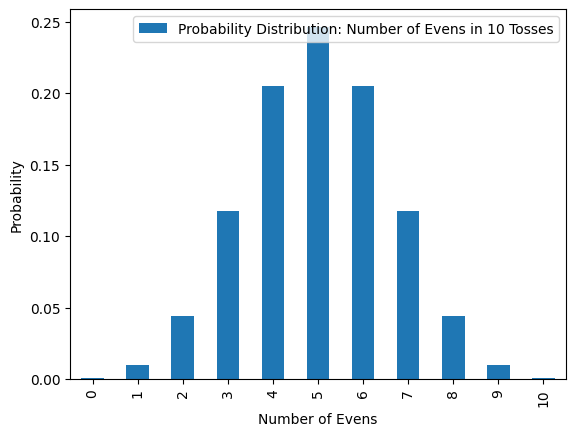

In [102]:
binomial_list =[]
n=10
p=0.5
for i in range(0,11):
  binomial_list.append(binomial_prob(n, p, i))

legend = f'Probability Distribution: Number of Evens in 10 Tosses'

pd.DataFrame({legend: binomial_list}).plot.bar();
plt.xlabel('Number of Evens')
plt.ylabel("Probability");

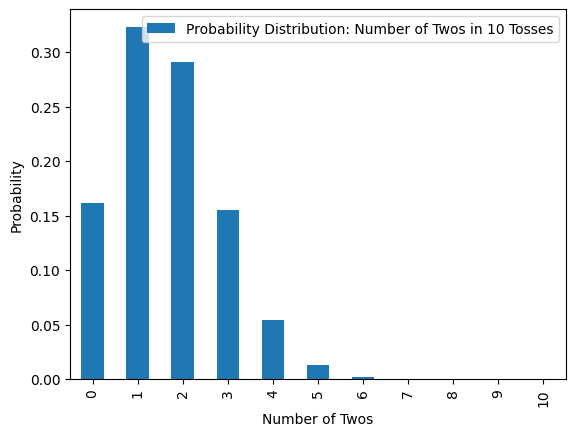

In [103]:
binomial_list =[]
n=10
p=1/6
for i in range(0,11):
  binomial_list.append(binomial_prob(n, p, i))

legend = f'Probability Distribution: Number of Twos in 10 Tosses'

pd.DataFrame({legend: binomial_list}).plot.bar();
plt.xlabel('Number of Twos')
plt.ylabel("Probability");

Here we see the peak of the distribution lies around 1. With a success probability of

, on average we should see about 1.6 twos in 10 tosses. Therefore a peak between 1 and 2 makes sense!

What we just calculated was the mean of our binomial distribution, 1.6. We calculated it by multiplying the probability of success by the number of trials. In general, we can calculate the mean by drawing a sample and taking the mean empirically, or computing it based on the expected value. For given parameters
, and
, the formula for the mean of a binomial distribution is
. We can also calculate the standard deviation of the binomial distribution using
. Evaluating this equation we see that the standard deviation of the binomial distribution with
 and

 is:

In [105]:
np.sqrt(10*(1/6)*(1-(1/6)))


np.float64(1.1785113019775793)

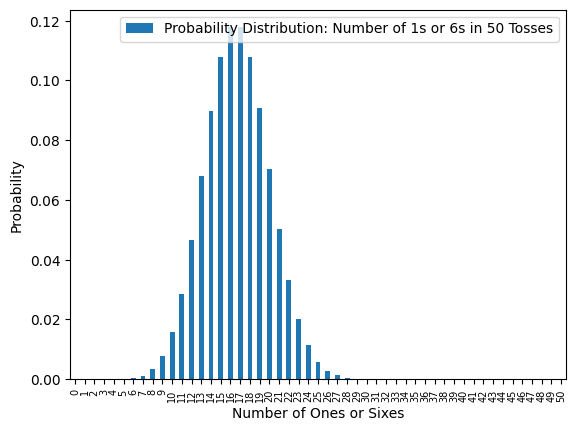

In [106]:
binomial_list =[]
n=50
p=1/3
for i in range(0,51):
  binomial_list.append(binomial_prob(n, p, i))

legend = f'Probability Distribution: Number of 1s or 6s in 50 Tosses'

pd.DataFrame({legend: binomial_list}).plot.bar();
plt.xlabel('Number of Ones or Sixes');
plt.ylabel("Probability");
plt.xticks(rotation = 90, fontsize=7);

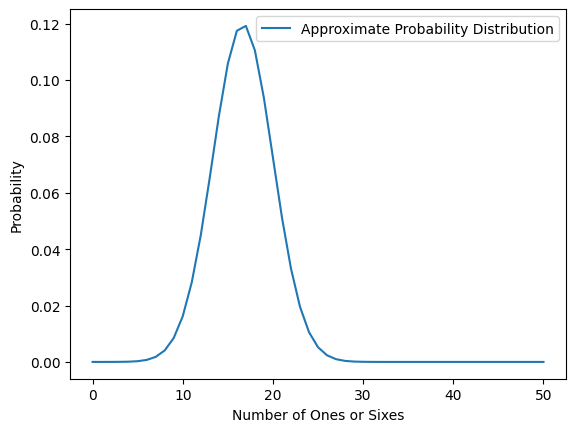

In [107]:
import scipy
import math

def normal_prob(mu, sigma, x):
    '''A function that calculates probabilities from a normal distribution with mean mu and standard deviation sigma'''
    bottom = math.sqrt(2 * math.pi * sigma**2)
    top = math.exp(-(x - mu)**2/(2 * sigma**2))
    return top/bottom

normal_list =[]
mu=16.66
sigma=3.33
for i in range(0,51):
  normal_list.append(normal_prob(mu, sigma, i))

legend = f'Approximate Probability Distribution'

pd.DataFrame({legend: normal_list}).plot();
plt.xlabel('Number of Ones or Sixes');
plt.ylabel("Probability");
#plt.xticks(rotation = 90, fontsize=7);

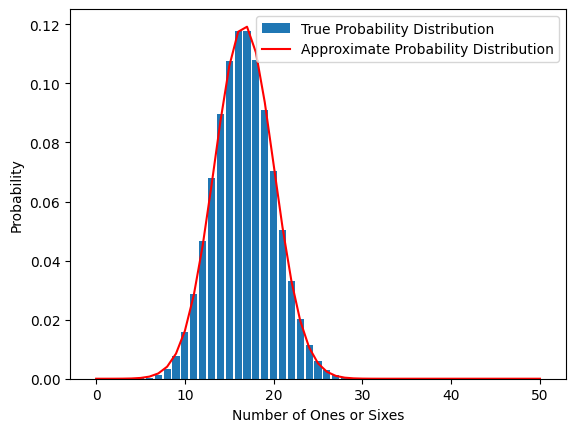

In [108]:
binomial_df = pd.DataFrame({"Real": binomial_list})
normal_df = pd.DataFrame({"Approximate": normal_list})

bin = plt.bar(height = binomial_df.Real, x = binomial_df.index)
norm, = plt.plot(normal_df, color='red')
plt.legend([bin, norm], ['True Probability Distribution','Approximate Probability Distribution'])
plt.xlabel('Number of Ones or Sixes');
plt.ylabel("Probability");
plt.show()

It looks like the normal is a pretty good approximation to the binomial in this case!

Learning about distributions like the ones presented in this chapter can help us better understand the data that we work with as data scientists. In the next few chapters, we will explore ways that statisticians and data scientists use distributions to test hypotheses about data.